Analyzing twitter data for network quality in Rwanda

Today, When people are bored at their house with this locked down one of my friend KennessaJr tweeted that he want 
to collect statistics about network usage in Rwanda, and he was lucky to collect around 200 hundred tweets where people where twittig about their internet quality and Location,
I found that it may be better to collect those tweets and run a data analysis on them and see how is the mobile internet network in Kigali.

In this book I will do an end to end Data Analysis project where I will collect data from tweets , clean them using regulars expressions and analyse them to ask the following question.
- Which provider has the fatest mobile internet in Kigali
- Which area has the best internet in Kigali
- What are mobile internet providers in Kigali?

Answer to those questions may help us to find the best ISP in Rwanda as of now.
Let start:


#### I.  Collecting Data

I will be collecting Data from a tweet posted by @KenessaJr on tweeter and start analyzing them.

In [1]:
import os
from tweepy import OAuthHandler, API, Cursor, RateLimitError, TweepError
from dotenv import load_dotenv
import logging

In [2]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

https://twitter.com/kenessajr/status/1246014150033248257
https://twitter.com/kenessajr/status/1246013771073626112

In [ ]:
../../.env

In [7]:
def read_credentials():
    """
    Return users os.getenv from the environnement variable
    raise a an exception if the os.getenv are empty

    Raises:
        NotImplementedError: (description]
    """
    load_dotenv('../../.env')
    consumer_key = os.getenv('TWITTER_CONSUMER_KEY')
    consumer_secret = os.getenv('TWITTER_CONSUMER_SECRET')
    access_token = os.getenv('TWITTER_ACCESS_TOKEN')
    access_secret = os.getenv('TWITTER_ACCESS_SECRET')

    if all([consumer_key, consumer_secret, access_token, access_secret]):
        return {"consumer_key": consumer_key,
                "consumer_secret": consumer_secret,
                "access_token": access_token,
                "access_secret": access_secret}
    else:
        raise ValueError('Please add a .env file and put the os.getenv on it,\
                         refer to the sample')

In [8]:
def get_twitter_auth():
    """Setup Twitter authentication.

    Return: tweepy.OAuthHandler object
    """
    try:
        credentials = read_credentials()
        consumer_key = credentials.get('consumer_key')
        consumer_secret = credentials.get('consumer_secret')
        access_token = credentials.get('access_token')
        access_secret = credentials.get('access_secret')
    except KeyError:
        logger.error("TWITTER_*  not found\n")
        sys.exit(1)
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    return auth


def get_twitter_client():
    """Setup Twitter API client.

    Return: tweepy.API object
    """
    auth = get_twitter_auth()
    client = API(auth)
    try:
        client.verify_credentials()
        logger.info("Authentication OK")
    except Exception as excp:
        logging.error("Error during authentication {}".format(excp))
    return client


In [9]:
api = get_twitter_client()

INFO:root:Authentication OK


In [48]:
def get_replies_to_tweets(user_name, tweet_id):
    replies = Cursor(api.search, q='to:{}'.format(user_name),
                     since_id=tweet_id, tweet_mode='extended').items()
    replies_data = {'full_text': list(), 'images': list()}
    while True:
        try:
            reply = replies.next()
            if not hasattr(reply, 'in_reply_to_status_id_str'):
                continue
            if str(reply.in_reply_to_status_id) == tweet_id:
                replies_data.get('full_text').append(reply.full_text)
                if 'media'in reply.entities:
                    replies_data.get('images').append([ image.get('media_url') for image in reply.entities.get('media')])
                logger.info("reply of tweet:{}".format(reply.full_text))
        except RateLimitError as e:
            logger.error("Twitter api rate limit reached".format(e))
            time.sleep(60)
            continue

        except TweepError as e:
            logger.error("Tweepy error occured:{}".format(e))
            break
        except StopIteration:
            break
        except Exception as e:
            
            logger.exception("Failed while fetching replies {}".format(e))
            break
    return replies_data

In [49]:
replies = get_replies_to_tweets("kenessajr", "1246013771073626112")

INFO:root:reply of tweet:@kenessajr Location: Nyamirambo 
Speed: 4.7 mbps
Isp: Mango telecom https://t.co/7UZEfiNcXt
INFO:root:reply of tweet:@kenessajr Location : Remera
Speed : 2.2 Mbps
ISP: @airtelrw https://t.co/Yg1TllQ4ve
INFO:root:reply of tweet:@kenessajr Location: Kimironko
Speed: 2.5 Mbps
ISP: @airtelrw

#MyInternetSpeedRw https://t.co/LM0C4prcKi
INFO:root:reply of tweet:@kenessajr Location: Kanombe
Speed: 7.9 Mbps
ISP: Airtel

#MyInternetSpeedRw https://t.co/tzcUdOuaqO
INFO:root:reply of tweet:@kenessajr Remera
ISP:MTN(3G) https://t.co/vzCMVPiObR
INFO:root:reply of tweet:@kenessajr Location: Muhanga
ISP: Mango https://t.co/N9MMZtSjUF
INFO:root:reply of tweet:@kenessajr Location : Gisozi
ISP: Axiom Networks https://t.co/We8350ns8F
INFO:root:reply of tweet:@kenessajr Location: Sonatube
Int speed: 3 Mbps
Provider: MTN https://t.co/5o8uM7Doj0
INFO:root:reply of tweet:@kenessajr Nyamirambo
Airtel / 3G https://t.co/ALEhPBTzpL
INFO:root:reply of tweet:@kenessajr Kimironko kwa Mushim

INFO:root:reply of tweet:@kenessajr @MangoRwanda Ndi nyamirambo kuryanyuma, nkoresha 4G ya mango, bamwiye ngo 750kbps , ark mbona igenda gake pe https://t.co/RVHx8hssSL
INFO:root:reply of tweet:@kenessajr Location : Kagarama 
Speed : 3.9
ISP MTN 3G

Up and down so far... https://t.co/WyuyaL6ypY
INFO:root:reply of tweet:@kenessajr Kimironko

Speed : fast attempt 210Kbps / 2nd attempt 1.1Mbps

ISP: MTN ( 3G ) https://t.co/YiTUWr9ihx
INFO:root:reply of tweet:@kenessajr Kibagabaga 
MTN https://t.co/LE3lJEf8PD
INFO:root:reply of tweet:@kenessajr Location : kimironko
ISP : @CanalboxR https://t.co/cwwPCC32Dw
INFO:root:reply of tweet:@kenessajr Location: Kimironko
Speed: 3.3 Mbps
ISP: MTN 4G https://t.co/fRT2VA7JFI
INFO:root:reply of tweet:@kenessajr @PopconnRw So far the worst
Speed: 8.9 KPBS

Can't even open Google https://t.co/sZ4kYzdj0o
INFO:root:reply of tweet:@kenessajr Speed: 5.7Mbps
Location: Kicukiro Niboyi
Product:MUP 1/day
Company:@FastnetISP_RW https://t.co/vx2CTwYlSI
INFO:root:rep

INFO:root:reply of tweet:@kenessajr Location:Kicukiro
ISP: @airtelrw  3G
Balance Now: 100626 GB https://t.co/9yVnwvkDh4
INFO:root:reply of tweet:@kenessajr Location:busogo(Musanze)
Network provider: @airtelrw https://t.co/FX3rywNFUC
INFO:root:reply of tweet:@kenessajr Location: Rebero
Speed: 12 Mbps
ISP: MTN https://t.co/IgVMBbUGjR
INFO:root:reply of tweet:@kenessajr Location: Kabeza 
ISP: Airtel

needless to say.... I'm having a shitty day 😭🤢 https://t.co/euKK2qdu9m
INFO:root:reply of tweet:@kenessajr Kibagabaga
MTN https://t.co/MDezMMEWV0
INFO:root:reply of tweet:@kenessajr ISP:Mtn 🤦🏾‍♂️
Location: Kacyiru https://t.co/GKdePsqfdS
INFO:root:reply of tweet:@kenessajr @MTNRwanda enough speed for only forwarded whatsapp msgs(NHS) from Aunties https://t.co/aVpkrva64k
INFO:root:reply of tweet:@kenessajr Location: Kimironko
Speed: 4.9 Mbps
ISP: @airtelrw  - 3G https://t.co/dJOno8jV9L
INFO:root:reply of tweet:@kenessajr ISP: ISPA
Package: “2MBPS dedicated” 🙄🙄
Location: Rubilizi https://t.co/O

INFO:root:reply of tweet:@kenessajr Location: Gatsata 
Speed: 1.4 Mbps
ISP: Mango Telecom 

#MyInternetSpeedRw https://t.co/zbGGdiO1N1
INFO:root:reply of tweet:@kenessajr Loc: Nyamirambo
Speed: 3.7 
ISP:MTN https://t.co/2youOT7OlB
INFO:root:reply of tweet:@kenessajr Location: Kagarama
Speed: 65Kbps
ISP: Axiom
Wireless broadband https://t.co/1XL617c9eM
INFO:root:reply of tweet:@kenessajr @kagced Location: Musanze
ISP: Airtel https://t.co/ToHorivMYe
INFO:root:reply of tweet:@kenessajr Location: Kicukiro
Speed:6.6 Mbps
ISP: @airtelrw https://t.co/tGNmi1rm2R
INFO:root:reply of tweet:@kenessajr Location: Kimironko 
Speed: 17 Mbps 😀
ISP: MTN Rwanda https://t.co/ctsXC6AWju
INFO:root:reply of tweet:@kenessajr Location: Kanombe- Nyarugunga https://t.co/LoQRcsdBs6
INFO:root:reply of tweet:@kenessajr Location:Town
Speed:2.8 Mbps
ISP:MTN https://t.co/SbIUYQEXUN
INFO:root:reply of tweet:@kenessajr Location: Kacyiru 
ISP: Liquid https://t.co/PWqJd6pveX
INFO:root:reply of tweet:@kenessajr Location: G

So far so good we have around 169 data, let collect more from another tweets 

In [26]:
replies

{'full_text': ['@kenessajr Location: Nyamirambo \nSpeed: 4.7 mbps\nIsp: Mango telecom https://t.co/7UZEfiNcXt',
  '@kenessajr Location : Remera\nSpeed : 2.2 Mbps\nISP: @airtelrw https://t.co/Yg1TllQ4ve',
  '@kenessajr Location: Kimironko\nSpeed: 2.5 Mbps\nISP: @airtelrw\n\n#MyInternetSpeedRw https://t.co/LM0C4prcKi',
  '@kenessajr Location: Kanombe\nSpeed: 7.9 Mbps\nISP: Airtel\n\n#MyInternetSpeedRw https://t.co/tzcUdOuaqO',
  '@kenessajr Remera\nISP:MTN(3G) https://t.co/vzCMVPiObR',
  '@kenessajr Location: Muhanga\nISP: Mango https://t.co/N9MMZtSjUF',
  '@kenessajr Location : Gisozi\nISP: Axiom Networks https://t.co/We8350ns8F',
  '@kenessajr Location: Sonatube\nInt speed: 3 Mbps\nProvider: MTN https://t.co/5o8uM7Doj0',
  '@kenessajr Nyamirambo\nAirtel / 3G https://t.co/ALEhPBTzpL',
  '@kenessajr Kimironko kwa Mushimire \nSpeed: 1.2 Mbps \nISP: MTN https://t.co/alC9CLxOVQ',
  '@kenessajr Location: Karuruma\nISP: @FastnetISP_RW https://t.co/nMSFHtUMSJ',
  '@kenessajr Location:kiyovu IS

Now we have 188 data points I think we can now start our analysis , In the next part we will be using pandas dataframe to store our data and make some analyisis on it .

In [17]:
import pandas as pd
import re
import string

/Users/es.py/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [53]:
data = pd.DataFrame.from_dict(replies,orient='index').transpose()

In [54]:
data.head()

,full_text,images
0,@kenessajr Location: Nyamirambo \nSpeed: 4.7 m...,[http://pbs.twimg.com/media/EU1QH7iX0AAi4bN.jpg]
1,@kenessajr Location : Remera\nSpeed : 2.2 Mbps...,[http://pbs.twimg.com/media/EU1FpbZWAAA8g6M.jpg]
2,@kenessajr Location: Kimironko\nSpeed: 2.5 Mbp...,[http://pbs.twimg.com/media/EU1Dup5WkAAXRpk.jpg]
3,@kenessajr Location: Kanombe\nSpeed: 7.9 Mbps\...,[http://pbs.twimg.com/media/EU0pEjWXYAQsPF_.jpg]
4,@kenessajr Remera\nISP:MTN(3G) https://t.co/vz...,[http://pbs.twimg.com/media/EU0KDBDWoAAeGYV.jpg]


In [56]:
print(data.loc[14, :].full_text)

@kenessajr Location: Kicukiro 
Speed: 3.2Mbps
ISP : MTN 4G https://t.co/tnSJIf9FQe


We can see that most of our data have **Location**: , **Speed**: and the link to the tweets as well as **ISP**

So let clean the tweet and return the information we need , this is where regex come into part

Or we can use something else, but let strech our minds with regex.

In [153]:
def get_data(row):
    """
    clean the data using regex and return specific fields
    """
    text = row.full_text
    location = re.search(r'\blocation:\s*(.*)', text, re.I)
    location = location.groups()[0] if location else None
    isp = re.search(r'\bISP:\s*(.*)', text, re.I)
    isp = isp.groups()[0].split(' ')[:-1] if isp else None
    speed = re.search(r'\bspeed:\s*(.*)', text, re.I)
    speed = speed.groups()[0] if speed else None
    return {"location" : location,
            "isp" : isp,
            "speed": speed,
            "images": row.images,
            "text": row.full_text}

In [61]:
data = data.apply(get_data, axis='columns', result_type='expand')

Let check null values 

In [62]:
data.location.isna().value_counts()

False    170
True      73
Name: location, dtype: int64

In [63]:
data.isp.isna().value_counts()

False    169
True      74
Name: isp, dtype: int64

In [64]:
data.speed.isna().value_counts()

False    123
True     120
Name: speed, dtype: int64

we can see that we have a lot of missing data , like 50 for location, 50 for isp, 87 for speed, Let me continue without them

Let me handle normal cases I will come back to the will come back to expections later.

Or will come back to cleaning later tomorow, we can call it a day

In [71]:
data.head()

,location,isp,speed,images
0,Nyamirambo,"[Mango, telecom]",4.7 mbps,[http://pbs.twimg.com/media/EU1QH7iX0AAi4bN.jpg]
1,None,[@airtelrw],None,[http://pbs.twimg.com/media/EU1FpbZWAAA8g6M.jpg]
2,Kimironko,[],2.5 Mbps,[http://pbs.twimg.com/media/EU1Dup5WkAAXRpk.jpg]
3,Kanombe,[],7.9 Mbps,[http://pbs.twimg.com/media/EU0pEjWXYAQsPF_.jpg]
4,None,[MTN(3G)],None,[http://pbs.twimg.com/media/EU0KDBDWoAAeGYV.jpg]


In [66]:
data.to_csv('../data/speed_rwanda.csv',)

#### Data Cleaning 

In [68]:
Let go with colums by columns 

False    236
True       7
Name: images, dtype: int64

#### Location

In [74]:
data.location.isna().value_counts()

False    170
True      73
Name: location, dtype: int64

As of now the location data has 73 missing values , let us not care about the missing values and treat the uniques values in the columsn

In [77]:
len(data.location.unique())

107

In [81]:
data.location.unique()

array(['Nyamirambo ', None, 'Kimironko', 'Kanombe', 'Muhanga', 'Sonatube',
       'Karuruma', 'kiyovu ISP: MTN https://t.co/J2uVI5muur',
       'Rubavu.                                       ISP: tnsp                                                         Network:4g https://t.co/dSTSnQ8Tg1',
       'Kicukiro ', 'Kacyiru ', 'Busanza', 'Kacyiru', 'Ruhuha, Bugesera',
       'kanombe', 'Kibagabaga', 'Remera', 'Nyamirambo', 'Rwamagana',
       'Kimironko ', 'Kicukiro', 'Lower Kiyovu ', 'kicukiro ',
       'Musanze (tetagouche) ', 'Kicukiro/ Kagarama',
       'Nyarutarama ( next to BAHO Hospital )', 'Remera -Nyabisindu',
       'Kicukiro Kagarama', 'Gisozi',
       'Rwamagana District                                                     Speed    : 5.8 Mbps                                         ISP          : 3G @MTNRwanda https://t.co/G96JriFORT',
       'Gikondo', 'kabeza kumucyo', 'Kicukiro Ngoma,  ', 'Rwinkwavu',
       'Gikondo- Nyenyeri', 'Gitega-Nyarugenge', 'Biryogo', 'Gacuriro',
  

from what we can see in the above cell people was typing their place their living in and add more additional data about the location.

We can just grap the first word they write and the do continue with it.

In [82]:
import string

In [118]:
cleaned_location = data.location.str.replace('/', ' ').str.replace('-', ' ').str.replace('|', ' ').replace(',', ' ').str.split(' ', expand=True).loc[:, 0]

In [119]:
len(cleaned_location.unique())

61

At least we are progressing we can see that data comes from 61 uniques locations

In [120]:
cleaned_location = cleaned_location.str.lower()

Once we lower the text we can see the spread has reduced.

In [121]:
len(cleaned_location.unique())

53

We are at 53 differents location in Kigali

In [116]:
cleaned_location.isna().value_counts(normalize=True)

False    0.699588
True     0.300412
Name: 0, dtype: float64

We can found that almost 30 % of data are missing but we will handle that later.

In [123]:
cleaned_location = cleaned_location.str.replace(',', '')

In [124]:
len(cleaned_location.unique())

52

In [126]:
cleaned_location.value_counts()

kicukiro           22
kimironko          16
kacyiru            14
kanombe            10
gisozi             10
gikondo             9
nyamirambo          8
remera              6
kabeza              6
rwamagana           4
kagarama            4
musanze             4
karuruma            3
kibagabaga          3
kimisagara          3
rusororo            3
rebero              2
ruyenzi             2
gacuriro            2
rubilizi            2
kimihurura          2
muhanga             2
biryogo             2
muhima              2
kiyovu              2
sonatubes           2
ruhuha              1
bugesera            1
kisimenti           1
kak                 1
nyarutarama         1
gatsata             1
nyabihu             1
gihara              1
lagos.              1
gitega              1
busogo              1
gasabo              1
town                1
niboye              1
nyakabanda          1
huye                1
busogo(musanze)     1
rubavu.             1
mumena              1
busanza   

Finaaly we can view those data in an histogram to see the spread of our location.

In [129]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

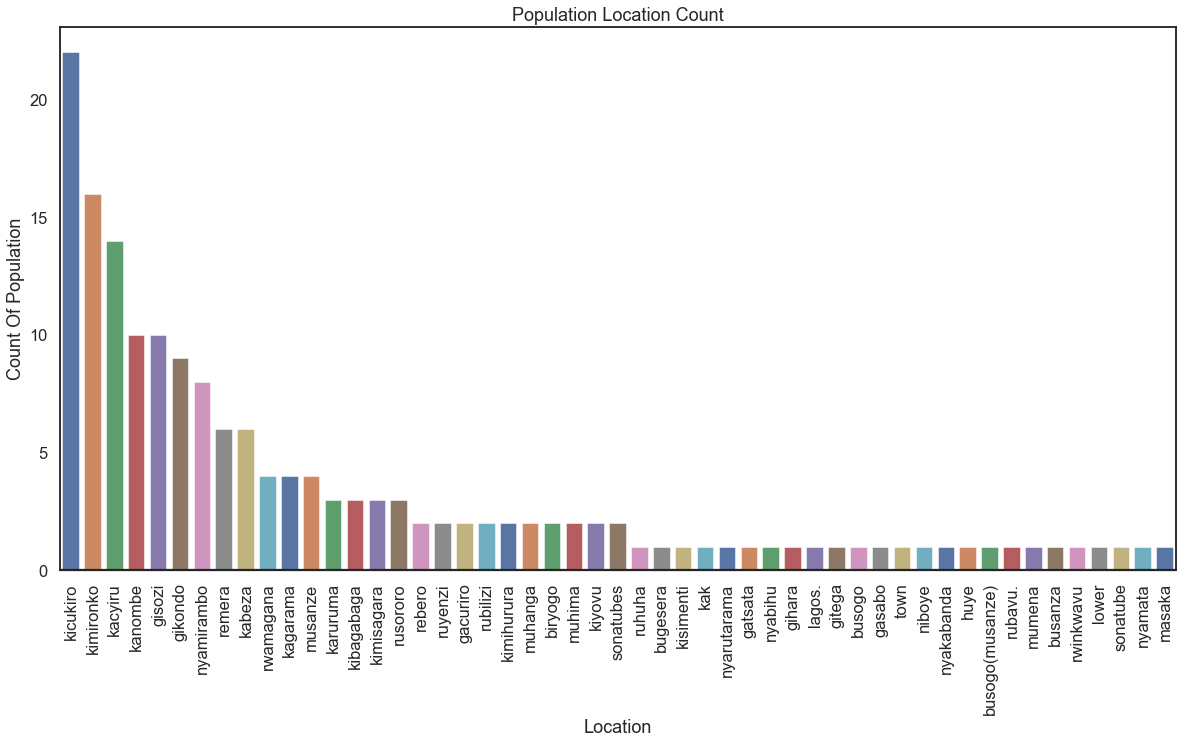

In [217]:
fig, ax  = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
plt.xticks(rotation=90)
sns.barplot(x=cleaned_location.value_counts().index, y=cleaned_location.value_counts().values, palette="deep", ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Count Of Population")
ax.set_xlabel("Location")
ax.set_title('Population Location Count')
fig.savefig('../images/population_location.png')  

We can conclude the analysis of the location columns here , we can come back to it later for missing values

In [140]:
data = data.assign(location_cleaned = cleaned_location)

#### TODO:
But more can be done on the locations, someone who is familiar with Rwanda Location can groups locations into sector

Let us go to the go with ISP colums

In [145]:
data.isp.isna().value_counts(normalize=True)

False    0.695473
True     0.304527
Name: isp, dtype: float64

Again 30% of the data are missing.

In [150]:
data.isp[:10]

0     [Mango, telecom]
1          [@airtelrw]
2                   []
3                   []
4            [MTN(3G)]
5              [Mango]
6    [Axiom, Networks]
7                 None
8                 None
9                [MTN]
Name: isp, dtype: object

In [ ]:
We can se that  the data where splited.

In [154]:
isp = data.isp.apply(lambda x : " ".join(x) if x else None)

In [155]:
isp.unique()

array(['Mango telecom', '@airtelrw', None, 'MTN(3G)', 'Mango',
       'Axiom Networks', 'MTN', '@FastnetISP_RW', 'MTN (4G)',
       'tnsp                                                         Network:4g',
       'Axiom networks', 'Axiom', 'Airtel', 'Airtel (4G)', 'Mango  (4G)',
       'MTN 4G', 'KT Rwanda Networks', 'Fastnet', 'BK Techouse',
       '@MTNRwanda', 'Airtel 3G', 'Mango/Ktrn', 'MTN 3G @MTNRwanda',
       'MTN ( 3G )', 'Netlink', 'Airtel / 3G', 'MTN 3G', 'Airtel (3G)',
       'MTN 3G Speed: 4.2Mbps', 'RTN  4G @ktRwanda', 'Mango 4G',
       'Mango Telecom', 'MTN -', 'MTN 😡', '@airtelrw  3G', 'airtel',
       'MTN mofos', '@MangoRwanda',
       '@liquidtelecom (Family Entertainment Package 25', 'trukonekt',
       '@airtelrw ', 'Mtn', '@airtelrw  - 3G', 'MTN (4G irekure)',
       'MTN Rwanda 3G', '3G Airtel', '@airtelrw 3G', 'Liquid Telecom',
       'MTN 4G Irekure(Monthly Unlimited)', 'Mtn 3G', '@mtnrwanda',
       'Truconnect 4G', 'airtel 3G', 'aitell 3G', 'MTN Rwanda😩',
 

From what we can see, we can:
- remove all the @ before the provider,
- remove 3G and 4G mention and save them
- Some providers put others names afters and we keep only the first words like Mango, Airtle, MTN, fatsnet

In [158]:
network_provider_regex = re.compile(r'\b3G\b | \b4G\b ', flags=re.I | re.X)

In [ ]:
Removing the @ before provider.

In [157]:
isp = isp.str.replace("@", '')

In [163]:
network_type = isp.str.findall(network_provider_regex)

In [167]:
network_type = network_type.apply(lambda x : x[0] if x else None)

In [168]:
network_type.isna().value_counts(normalize=True)

True     0.814815
False    0.185185
Name: isp, dtype: float64

Only 20% of people gave their isp but we can keep them like that.

In [170]:
data = data.assign(network_type=network_type)

In [172]:
data.tail()

,location,isp,speed,images,location_cleaned,network_type
238,Mumena,"[Mango, Telecom]",8.5 Mbps,None,mumena,None
239,Gikondo,[MTN],7.2 Mbps,None,gikondo,None
240,Kimisagara,[Airtel],1.2 Mbps,None,kimisagara,None
241,Gisozi,"[CB, Net]",34 Mbps,None,gisozi,None
242,Kimironko,[],4.6 Mbps,None,kimironko,None


let remove those mentions from the data

In [179]:
isp = isp.str.replace(network_provider_regex, '').str.replace('/', '').str.replace('(', '').str.replace(')', '').str.replace('-', '')

In [180]:
isp.unique()

array(['Mango telecom', 'airtelrw', None, 'MTN', 'Mango',
       'Axiom Networks', 'FastnetISP_RW', 'MTN ',
       'tnsp                                                         Network:',
       'Axiom networks', 'Axiom', 'Airtel', 'Airtel ', 'Mango  ',
       'KT Rwanda Networks', 'Fastnet', 'BK Techouse', 'MTNRwanda',
       'MangoKtrn', 'MTN  MTNRwanda', 'MTN   ', 'Netlink', 'Airtel  ',
       'MTN  Speed: 4.2Mbps', 'RTN   ktRwanda', 'Mango ', 'Mango Telecom',
       'MTN 😡', 'airtelrw  ', 'airtel', 'MTN mofos', 'MangoRwanda',
       'liquidtelecom Family Entertainment Package 25', 'trukonekt',
       'airtelrw ', 'Mtn', 'airtelrw   ', 'MTN  irekure', 'MTN Rwanda ',
       ' Airtel', 'Liquid Telecom', 'MTN  IrekureMonthly Unlimited',
       'Mtn ', 'mtnrwanda', 'Truconnect ', 'airtel ', 'aitell ',
       'MTN Rwanda😩', 'TrueConnect', 'Liquid Home', 'MTN Rwanda',
       'Liquid', 'CB Net'], dtype=object)

In [187]:
isp = isp.str.lower().str.strip().str.split(' ', expand=True)[0]

let remove 'rw or rwanda' suffix to the data and see whtat  we can have

In [196]:
isp = isp.str.replace('rwanda', '').str.replace('rw', '').str.replace('telecom', '').str.replace('isp_', '')

In [197]:
isp.value_counts()

mtn            59
airtel         45
mango          16
axiom           5
liquid          5
fastnet         4
bk              1
tnsp            1
rtn             1
aitell          1
mangoktrn       1
cb              1
trueconnect     1
truconnect      1
netlink         1
trukonekt       1
kt              1
Name: 0, dtype: int64

We can see that most of the provideers are now presents , we can now remove word that was not well typed.

In [213]:
isp = isp.replace(to_replace={'truconnect':'trueconnect', 'trueconnect':'trueconnect', 'trukonekt':'trueconnect'})\
    .replace(to_replace='aitell', value='airtel')\
    .replace(to_replace='mangoktrn', value='mango')\
    .replace(to_replace='cb', value='CbNet')

In [214]:
isp.value_counts()

mtn            59
airtel         46
mango          17
axiom           5
liquid          5
fastnet         4
trueconnect     3
netlink         1
CbNet           1
rtn             1
tnsp            1
bk              1
kt              1
Name: 0, dtype: int64

In [215]:
data = data.assign(isp_cleaned = isp)

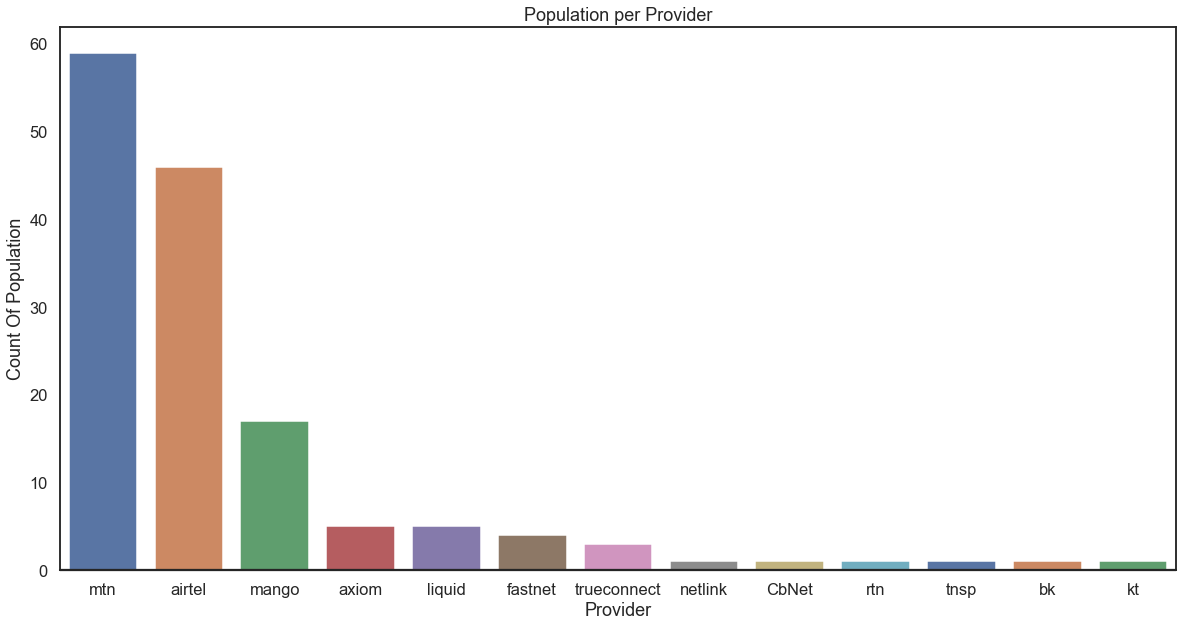

In [216]:
fig, ax  = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
sns.barplot(x=isp.value_counts().index, y=isp.value_counts().values, palette="deep", ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Count Of Population")
ax.set_xlabel("Provider")
ax.set_title('Population per Provider')
fig.savefig('../images/population_provider.png') 

In [ ]:
As well as for the p